In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import Image
from fluentopt.utils import flatten_dict
import seaborn as sns
from scipy.stats import binned_statistic
pd.options.display.max_columns = 100

def show(df):
    for j in df.index:
        print(j)
        X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:100]
        X = grid_of_images_default(X)
        imsave('out.png', X)
        im = Image('out.png')
        display(im)
db = load_db()

Using Theano backend.


In [2]:
jobs = db.jobs_with()
rows = []
for j in jobs:
    col = {}
    if j['stats'] is None:
        continue
    for k, v in j['stats'].items():
        col[k] = v
    try:
        col['stride'] = j['content']['train']['model']['params']['code_activations'][1]['params']['stride']
    except Exception:
        pass
    try:
        col['nb_layers'] = len(j['content']['train']['model']['params']['encode_nb_filters'])
    except Exception:
        col['nb_layers'] = len(j['content']['train']['model'][1]['params']['encode_nb_filters'])    

    try:
         col['zero_ratio'] = j['content']['train']['model']['params']['code_activations'][1]['params']['zero_ratio']
    except Exception:
        pass
    try:
        col['bottleneck'] = min(j['content']['train']['model']['params']['encode_nb_filters'])
    except Exception:
        pass
    try:
        col['noise'] = j['content']['train']['model'][0]['params']['params']['proba']
    except Exception:
        pass
    col['sampler'] = j['sampler']
    col['job_id'] = j['summary']
    #col['noise_count'] = 1.0 - (col['digits_count'] + col['letters_count'])
    #col['digits_object'] = 1 - col['digits_entropy']
    #col['letters_object'] = 1 - col['letters_entropy']
    #col['digits_and_letters_object'] = 1 - col['digits_and_letters_entropy']
    #col['emnist_object'] = 1 - col['emnist_letters_entropy']
    rows.append(col)
    
df_full = pd.DataFrame(rows)
df_full = df_full.set_index('job_id')
df_full.to_csv('hypers.csv')

## Fix stride. vary nb of layers

In [97]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['stride']==2]
df = df.sort_values(by='nb_layers')
df

,bottleneck,digits_and_letters_entropy,digits_and_letters_objectness,digits_count,digits_diversity,digits_entropy,digits_frechet,digits_max,digits_mmd,digits_objectness,emnist_digits_count,emnist_digits_max,emnist_letters_count,emnist_letters_entropy,emnist_letters_max,emnist_objectness,hwrt_diversity,hwrt_entropy,hwrt_objectness,letters_count,letters_diversity,letters_entropy,letters_frechet,letters_max,letters_mmd,letters_objectness,nb_layers,nb_params,noise,ratio_unique,sampler,stride,zero_ratio
job_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9e80faae4fb4ae36b2766648824eac09,128.0,0.116791,12.550046,0.086,0.800376,0.191304,6.500855e+07,0.078,0.002076,4.151053,0.018,0.013,0.757,0.352276,0.141,5.123708,0.522073,0.082004,14.290085,0.848,0.810578,0.347885,1.427359e+08,0.501,0.002082,5.316375,1,6529.0,NaN,0.967,mnist_deep,2.0,NaN
68adffea6c98fedf329644122d56fa36,128.0,0.039539,19.538910,0.577,0.911845,0.087772,6.482822e+07,0.517,0.002000,6.700230,0.090,0.080,0.568,0.248701,0.173,13.314023,0.788424,0.112240,57.670715,0.365,0.926126,0.116562,1.426116e+08,0.316,0.002006,14.033784,2,825985.0,NaN,1.000,mnist_deep,2.0,NaN
901dad8ec11f23191d86fa6279d47c65,128.0,0.031575,15.541529,0.707,0.915356,0.084485,6.481787e+07,0.656,0.002000,6.845440,0.108,0.096,0.482,0.246643,0.154,12.352144,0.765771,0.100727,52.514980,0.250,0.927061,0.110468,1.426481e+08,0.213,0.002006,14.415942,3,1645441.0,NaN,1.000,mnist_deep,2.0,NaN
63c1be88f742117d115d076216ac85d1,128.0,0.020904,10.919588,0.849,0.916866,0.055326,6.480193e+07,0.794,0.002000,7.269512,0.130,0.121,0.440,0.208254,0.196,10.687059,0.676443,0.095547,33.215351,0.124,0.778797,0.088160,1.426905e+08,0.113,0.002006,9.548794,4,2464897.0,NaN,1.000,mnist_deep,2.0,NaN
581582abec259852f4a01f7e79ed97db,128.0,0.020118,7.382170,0.964,0.851105,0.056269,6.483472e+07,0.886,0.002008,6.220617,0.128,0.122,0.458,0.212822,0.178,8.264774,0.614825,0.109743,22.542377,0.024,0.767487,0.096898,1.427642e+08,0.021,0.002014,9.044111,5,3284353.0,NaN,0.996,mnist_deep,2.0,NaN
8ecaf99d22cf4cb469912b9fae25aac2,128.0,0.008583,4.169066,0.998,0.630844,0.042352,6.493132e+07,0.967,0.005644,3.949130,0.098,0.093,0.331,0.196629,0.108,5.691341,0.426911,0.099368,8.652865,0.001,0.602850,0.086963,1.428706e+08,0.001,0.005650,5.471218,6,4103809.0,NaN,0.593,mnist_deep,2.0,NaN


In [ ]:
show(df)

## Fix nb layers. Vary stride

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['nb_layers'] == 3]
df = df.sort_values(by='stride')
df

In [ ]:
show(df)

# wta lifetime sparsity

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_lifetime']
df = df[df['zero_ratio']==0.7]
df = df.sort_values(by='nb_layers')
df

In [ ]:
show(df)

## wta kchannel

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['zero_ratio']==0.9]
df = df.sort_values(by='nb_layers')
df

In [ ]:
show(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['nb_layers']==4]
df = df.sort_values(by='zero_ratio')
df

In [ ]:
show(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
df = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)
show(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
df = df[df['nb_layers']==3]
df = df.sort_values(by='noise')
df = df[df['noise'] < 0.6]
show(df)

In [ ]:
df.plot('noise', ['digits_count'])

In [ ]:
from IPython.display import Image
for j in df.index:
    print(j)
    X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:100]
    X = grid_of_images_default(X)
    imsave('out.png', X)
    im = Image('out.png')
    display(im)

In [ ]:
x = df_full[['nb_layers', 'bottleneck', 'stride', 'zero_ratio', 'noise']].fillna(-1)
y = 20 * df_full['letters_count'] + df_full['letters_objectness']

In [ ]:
import scikitplot as pl
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)
reg.feature_importances_ = reg.coef_
pl.estimators.plot_feature_importances(reg, feature_names=x.columns)

In [ ]:
df_full.plot('emnist_letters_count', 'emnist_objectness', kind='scatter')

In [ ]:
d = df_full.copy()
#d['y'] = d['emnist_letters_count']
d['y'] =  d['emnist_letters_count'] + 5*d['emnist_object'] + 10*d['letters_diversity']
#d['y'] =  30*d['emnist_digits_count'] + d['emnist_objectness']
#d['y'] = d['letters_objectness']
d = d.sort_values(by='y', ascending=False)
show(d.iloc[0:10])

In [98]:
labels = [
    'digits_count', 
    'letters_count', 
    'digits_objectness', 
    'letters_objectness', 
    'digits_and_letters_objectness', 
    'emnist_objectness',
    'digits_object',
    'letters_object'
]

d = df_full[labels].corr()
def m(val):
    color = 'yellow' if abs(val) > 0.8 else 'white'
    return 'background-color: %s' % color

d = d.style.applymap(m)
d

KeyError: "['digits_object' 'letters_object'] not in index"

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


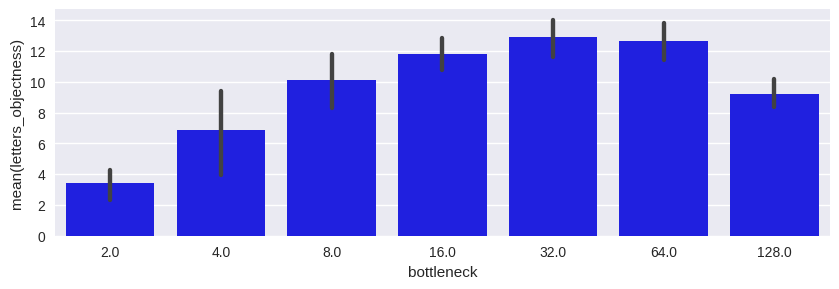

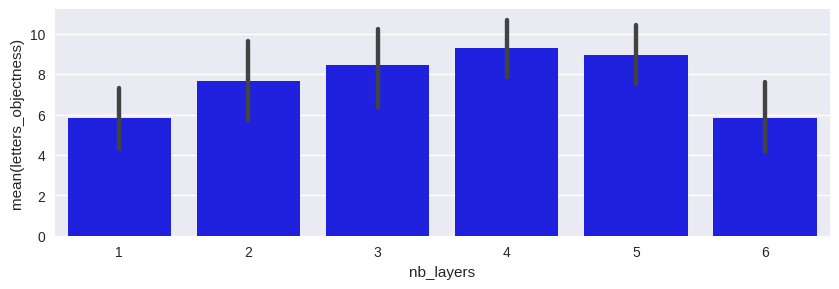

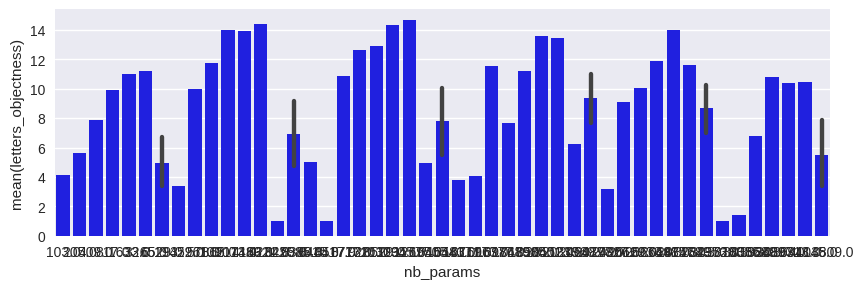

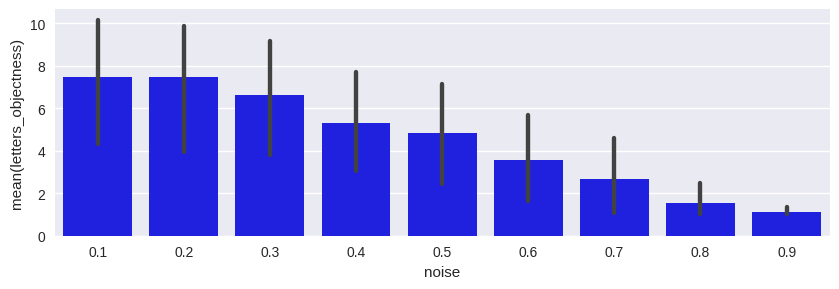

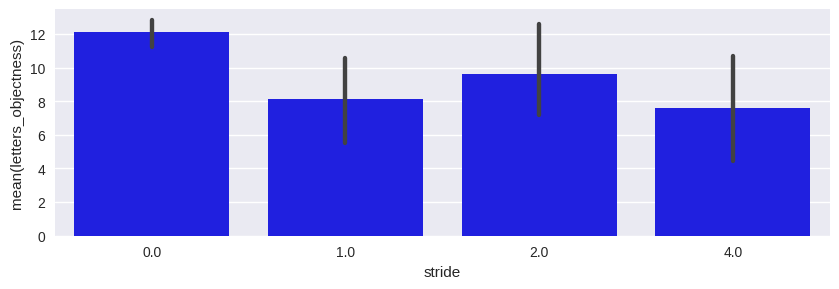

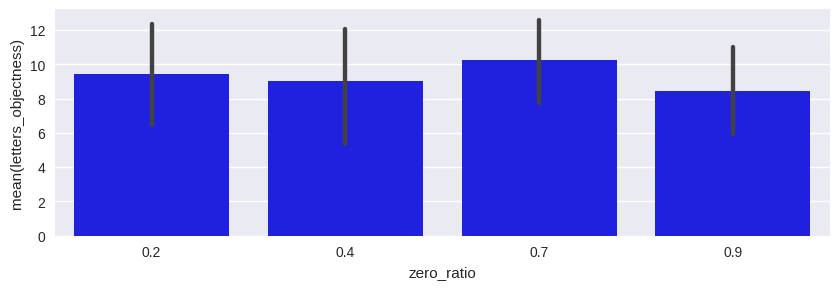

In [104]:
d = df_full
#d = df_full.fillna(-1)
#d = d[d['sampler']  == 'mnist_capacity']
ycols = ['letters_objectness']
xcols = ['bottleneck', 'nb_layers', 'nb_params', 'noise', 'stride', 'zero_ratio']
for xcol in xcols:
    for ycol in ycols:
        fig = plt.figure(figsize=(10, 3))
        sns.barplot(x=xcol, y=ycol, data=d, color='blue')
        plt.show()

In [65]:
d = df_full
d = d[d['nb_layers']==3]
d = d.sort_values(by='digits_count', ascending=False)
d.iloc[0:10]
#show(d.iloc[0:20])

,bottleneck,digits_and_letters_entropy,digits_and_letters_objectness,digits_count,digits_diversity,digits_entropy,digits_frechet,digits_max,digits_mmd,digits_objectness,emnist_digits_count,emnist_digits_max,emnist_letters_count,emnist_letters_entropy,emnist_letters_max,emnist_objectness,hwrt_diversity,hwrt_entropy,hwrt_objectness,letters_count,letters_diversity,letters_entropy,letters_frechet,letters_max,letters_mmd,letters_objectness,nb_layers,nb_params,noise,ratio_unique,sampler,stride,zero_ratio
job_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44b942e6bcce377ba6f5f05a86ff7a8c,NaN,0.038622,8.052114,0.925,0.893245,0.076580,6.497861e+07,0.814,0.002004,6.602422,0.073,0.064,0.357,0.274465,0.141,7.774411,0.539675,0.125759,13.212063,0.029,0.754899,0.130220,1.428824e+08,0.023,0.002010,7.922969,3,1645441.0,0.6,0.998,mnist_noise,NaN,NaN
7e7632c0f86786bda97931c4e88bbfd7,64.0,0.031813,10.997512,0.884,0.922616,0.079285,6.480698e+07,0.789,0.002000,7.017381,0.059,0.054,0.582,0.268081,0.143,11.069925,0.779705,0.121033,51.646221,0.076,0.935098,0.112106,1.426599e+08,0.069,0.002006,14.681621,3,1235777.0,NaN,1.000,mnist_capacity,NaN,NaN
c66d4d7f3ef76fd52b2c6b354e94c3d0,NaN,0.029848,8.783053,0.877,0.869099,0.064859,6.491145e+07,0.799,0.002018,6.390784,0.105,0.094,0.349,0.236368,0.138,7.774895,0.522668,0.094505,13.631748,0.078,0.716927,0.121332,1.428233e+08,0.062,0.002024,7.270512,3,1645441.0,0.5,0.992,mnist_noise,NaN,NaN
4b472da80b52e26b09a8e707ba4eaf6b,NaN,0.026926,10.059696,0.876,0.902792,0.059979,6.487618e+07,0.807,0.002006,6.976979,0.129,0.115,0.318,0.241883,0.111,9.481090,0.584033,0.109735,18.036098,0.088,0.807381,0.133589,1.427843e+08,0.075,0.002012,9.207334,3,1645441.0,0.4,0.997,mnist_noise,NaN,NaN
b75919e611b9c6ed0f063749d17ad699,32.0,0.033376,11.621178,0.869,0.925609,0.079668,6.482478e+07,0.770,0.002000,7.027142,0.084,0.074,0.454,0.279138,0.132,11.713885,0.779642,0.130803,50.456188,0.099,0.923382,0.107689,1.427004e+08,0.086,0.002006,14.359535,3,1030945.0,NaN,1.000,mnist_capacity,NaN,NaN
a26b661b10ec3f4a68d9bd6454c5e70b,NaN,0.028446,10.185779,0.858,0.897220,0.068832,6.485919e+07,0.783,0.002002,6.793728,0.119,0.110,0.407,0.231588,0.161,9.530937,0.635383,0.100663,24.642715,0.107,0.796329,0.116807,1.427633e+08,0.090,0.002008,9.415709,3,1645441.0,0.3,0.999,mnist_noise,NaN,NaN
12b0486a0d443763cff37a8e15717a0d,NaN,0.028814,11.490499,0.846,0.929481,0.078692,6.483607e+07,0.767,0.002000,7.124670,0.122,0.111,0.395,0.232104,0.163,10.791754,0.697339,0.111855,33.744892,0.128,0.850810,0.119772,1.427255e+08,0.104,0.002006,10.908233,3,1645441.0,0.2,1.000,mnist_noise,NaN,NaN
ab45d34bd45790c492f913e11f28b1dd,16.0,0.031493,12.093976,0.813,0.926871,0.080470,6.484045e+07,0.743,0.002000,7.033976,0.149,0.125,0.399,0.248085,0.130,11.431773,0.771540,0.112092,52.949261,0.148,0.890084,0.107840,1.426997e+08,0.123,0.002006,12.929391,3,928529.0,NaN,1.000,mnist_capacity,NaN,NaN
6ceac389d453ad7150255ccefded856d,NaN,0.037004,11.604217,0.776,0.918313,0.088841,6.485121e+07,0.695,0.002004,6.800984,0.094,0.081,0.447,0.253165,0.141,8.273498,0.695097,0.114293,33.349384,0.174,0.836629,0.126118,1.427251e+08,0.142,0.002010,10.454698,3,1645441.0,0.1,0.998,mnist_noise,NaN,NaN


In [85]:
ae = load('../results/mnist')

In [75]:
letters = np.load('../../data/hwrt.npz')
letters = letters['X'] / 255.0

In [72]:
x = letters[0:25]
xl = [x]
for _ in range(30):
    x = ae.predict(x)
    xl.append(x)
xl = np.array(xl)

shape = xl.shape[0], xl.shape[1]
xl = xl.reshape((xl.shape[0]*xl.shape[1],) + xl.shape[2:])

In [73]:
im = grid_of_images_default(xl, shape=shape)
imsave('out.png', im)

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [ ]:
x = letters[0:2000]
e = (np.abs(ae.predict(x) - x).sum(axis=(1, 2, 3)) < 100).mean()
print(e)

In [94]:
print(e)

0.643


In [93]:
letters.shape

(168233, 1, 28, 28)